<a href="https://colab.research.google.com/github/jojosam90/ltsm/blob/main/Multivariate%20Time%20Series%20Modeling%20using%20LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [57]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [58]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.preprocessing.sequence import TimeseriesGenerator
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import tensorflow as tf
import datetime
import numpy as np

mpl.rcParams['figure.figsize'] = (10,8)
mpl.rcParams['axes.grid'] = False

In [59]:
df = pd.read_csv('/content/drive/MyDrive/dataset/Energy/Year 2017.csv')

In [60]:
df

,_id,CP ID,Connector,Start Date,Start Time,End Date,End Time,Total kWh,Site,Model
0,1,51519,2,2017-08-31T00:00:00,22:12,2017-08-31T00:00:00,23:11,18.270,"Broxden Park & Ride, Perth",APT Triple Rapid Charger
1,2,51250,1,2017-08-31T00:00:00,22:01,2017-08-31T00:00:00,22:31,19.450,"Crown Inn Wynd Car Park, Auchterarder",Siemens Triple Rapid Charger
2,3,50575,2,2017-08-31T00:00:00,21:21,2017-08-31T00:00:00,21:59,19.710,"South Inch Car Park, Perth",APT Triple Rapid Charger
3,4,51516,2,2017-08-31T00:00:00,20:43,2017-08-31T00:00:00,21:03,9.840,Kinross Park and Ride,APT Triple Rapid Charger
4,5,50994,2,2017-08-31T00:00:00,19:50,2017-08-31T00:00:00,20:50,14.170,"Leslie Street Car Park, Blairgowrie",APT Triple Rapid Charger
...,...,...,...,...,...,...,...,...,...,...
13671,13672,50745,2,2016-01-09T00:00:00,09:22,2016-01-09T00:00:00,09:37,3.580,Kinross Park and Ride,APT Triple Rapid Charger
13672,13673,50281,1,2016-01-09T00:00:00,08:54,2016-01-09T00:00:00,16:37,10.380,"Rie-Achan Road Car Park, Pitlochry",APT 22kW Dual Outlet
13673,13674,50285,1,2016-01-09T00:00:00,08:22,2016-01-09T00:00:00,14:32,13.930,Broxden Park & Ride,APT 22kW Dual Outlet
13674,13675,50281,2,2016-01-09T00:00:00,07:51,2016-01-09T00:00:00,09:01,3.870,"Rie-Achan Road Car Park, Pitlochry",APT 22kW Dual Outlet


In [61]:
df['Start Date'] = pd.to_datetime(df['Start Date'], format='%Y-%m-%d %H:%M:%S') 
df['End Date'] = pd.to_datetime(df['End Date'], format='%Y-%m-%d %H:%M:%S')

In [62]:
df

,_id,CP ID,Connector,Start Date,Start Time,End Date,End Time,Total kWh,Site,Model
0,1,51519,2,2017-08-31,22:12,2017-08-31,23:11,18.270,"Broxden Park & Ride, Perth",APT Triple Rapid Charger
1,2,51250,1,2017-08-31,22:01,2017-08-31,22:31,19.450,"Crown Inn Wynd Car Park, Auchterarder",Siemens Triple Rapid Charger
2,3,50575,2,2017-08-31,21:21,2017-08-31,21:59,19.710,"South Inch Car Park, Perth",APT Triple Rapid Charger
3,4,51516,2,2017-08-31,20:43,2017-08-31,21:03,9.840,Kinross Park and Ride,APT Triple Rapid Charger
4,5,50994,2,2017-08-31,19:50,2017-08-31,20:50,14.170,"Leslie Street Car Park, Blairgowrie",APT Triple Rapid Charger
...,...,...,...,...,...,...,...,...,...,...
13671,13672,50745,2,2016-01-09,09:22,2016-01-09,09:37,3.580,Kinross Park and Ride,APT Triple Rapid Charger
13672,13673,50281,1,2016-01-09,08:54,2016-01-09,16:37,10.380,"Rie-Achan Road Car Park, Pitlochry",APT 22kW Dual Outlet
13673,13674,50285,1,2016-01-09,08:22,2016-01-09,14:32,13.930,Broxden Park & Ride,APT 22kW Dual Outlet
13674,13675,50281,2,2016-01-09,07:51,2016-01-09,09:01,3.870,"Rie-Achan Road Car Park, Pitlochry",APT 22kW Dual Outlet


In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13676 entries, 0 to 13675
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   _id         13676 non-null  int64         
 1   CP ID       13676 non-null  int64         
 2   Connector   13676 non-null  int64         
 3   Start Date  13676 non-null  datetime64[ns]
 4   Start Time  13676 non-null  object        
 5   End Date    13639 non-null  datetime64[ns]
 6   End Time    13639 non-null  object        
 7   Total kWh   13639 non-null  float64       
 8   Site        13676 non-null  object        
 9   Model       13676 non-null  object        
dtypes: datetime64[ns](2), float64(1), int64(3), object(4)
memory usage: 1.0+ MB


In [64]:
check_nan_in_df = df.isnull()
print (check_nan_in_df)

         _id  CP ID  Connector  Start Date  Start Time  End Date  End Time  \
0      False  False      False       False       False     False     False   
1      False  False      False       False       False     False     False   
2      False  False      False       False       False     False     False   
3      False  False      False       False       False     False     False   
4      False  False      False       False       False     False     False   
...      ...    ...        ...         ...         ...       ...       ...   
13671  False  False      False       False       False     False     False   
13672  False  False      False       False       False     False     False   
13673  False  False      False       False       False     False     False   
13674  False  False      False       False       False     False     False   
13675  False  False      False       False       False     False     False   

       Total kWh   Site  Model  
0          False  False  False

In [65]:
df1 = df.dropna()

In [66]:
df1

,_id,CP ID,Connector,Start Date,Start Time,End Date,End Time,Total kWh,Site,Model
0,1,51519,2,2017-08-31,22:12,2017-08-31,23:11,18.270,"Broxden Park & Ride, Perth",APT Triple Rapid Charger
1,2,51250,1,2017-08-31,22:01,2017-08-31,22:31,19.450,"Crown Inn Wynd Car Park, Auchterarder",Siemens Triple Rapid Charger
2,3,50575,2,2017-08-31,21:21,2017-08-31,21:59,19.710,"South Inch Car Park, Perth",APT Triple Rapid Charger
3,4,51516,2,2017-08-31,20:43,2017-08-31,21:03,9.840,Kinross Park and Ride,APT Triple Rapid Charger
4,5,50994,2,2017-08-31,19:50,2017-08-31,20:50,14.170,"Leslie Street Car Park, Blairgowrie",APT Triple Rapid Charger
...,...,...,...,...,...,...,...,...,...,...
13671,13672,50745,2,2016-01-09,09:22,2016-01-09,09:37,3.580,Kinross Park and Ride,APT Triple Rapid Charger
13672,13673,50281,1,2016-01-09,08:54,2016-01-09,16:37,10.380,"Rie-Achan Road Car Park, Pitlochry",APT 22kW Dual Outlet
13673,13674,50285,1,2016-01-09,08:22,2016-01-09,14:32,13.930,Broxden Park & Ride,APT 22kW Dual Outlet
13674,13675,50281,2,2016-01-09,07:51,2016-01-09,09:01,3.870,"Rie-Achan Road Car Park, Pitlochry",APT 22kW Dual Outlet


In [67]:
df1['StartDateTime'] = pd.to_datetime(df1['Start Date'].astype(str) + ' ' +df1['Start Time'].astype(str))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [68]:
df1['EndDateTime'] = pd.to_datetime(df1['End Date'].astype(str) + ' ' +df1['End Time'].astype(str))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [69]:
df1 = df1.drop(columns=['_id','CP ID','Start Date', 'Start Time','End Date','End Time'])
df1=df1[['StartDateTime','EndDateTime','Connector','Site','Model','Total kWh']]
df1

,StartDateTime,EndDateTime,Connector,Site,Model,Total kWh
0,2017-08-31 22:12:00,2017-08-31 23:11:00,2,"Broxden Park & Ride, Perth",APT Triple Rapid Charger,18.270
1,2017-08-31 22:01:00,2017-08-31 22:31:00,1,"Crown Inn Wynd Car Park, Auchterarder",Siemens Triple Rapid Charger,19.450
2,2017-08-31 21:21:00,2017-08-31 21:59:00,2,"South Inch Car Park, Perth",APT Triple Rapid Charger,19.710
3,2017-08-31 20:43:00,2017-08-31 21:03:00,2,Kinross Park and Ride,APT Triple Rapid Charger,9.840
4,2017-08-31 19:50:00,2017-08-31 20:50:00,2,"Leslie Street Car Park, Blairgowrie",APT Triple Rapid Charger,14.170
...,...,...,...,...,...,...
13671,2016-01-09 09:22:00,2016-01-09 09:37:00,2,Kinross Park and Ride,APT Triple Rapid Charger,3.580
13672,2016-01-09 08:54:00,2016-01-09 16:37:00,1,"Rie-Achan Road Car Park, Pitlochry",APT 22kW Dual Outlet,10.380
13673,2016-01-09 08:22:00,2016-01-09 14:32:00,1,Broxden Park & Ride,APT 22kW Dual Outlet,13.930
13674,2016-01-09 07:51:00,2016-01-09 09:01:00,2,"Rie-Achan Road Car Park, Pitlochry",APT 22kW Dual Outlet,3.870


In [70]:
df1['Duration'] = df1['EndDateTime'] - df1['StartDateTime']
df1['Duration'] = df1['Duration'] / np.timedelta64(1, 'h')

In [71]:
#df1 = df1.drop(columns=['StartDateTime','EndDateTime'])
df1 = df1.drop(columns=['StartDateTime'])
df1=df1[['Connector','EndDateTime','Duration','Site','Model','Total kWh']]
df1

,Connector,EndDateTime,Duration,Site,Model,Total kWh
0,2,2017-08-31 23:11:00,0.983333,"Broxden Park & Ride, Perth",APT Triple Rapid Charger,18.270
1,1,2017-08-31 22:31:00,0.500000,"Crown Inn Wynd Car Park, Auchterarder",Siemens Triple Rapid Charger,19.450
2,2,2017-08-31 21:59:00,0.633333,"South Inch Car Park, Perth",APT Triple Rapid Charger,19.710
3,2,2017-08-31 21:03:00,0.333333,Kinross Park and Ride,APT Triple Rapid Charger,9.840
4,2,2017-08-31 20:50:00,1.000000,"Leslie Street Car Park, Blairgowrie",APT Triple Rapid Charger,14.170
...,...,...,...,...,...,...
13671,2,2016-01-09 09:37:00,0.250000,Kinross Park and Ride,APT Triple Rapid Charger,3.580
13672,1,2016-01-09 16:37:00,7.716667,"Rie-Achan Road Car Park, Pitlochry",APT 22kW Dual Outlet,10.380
13673,1,2016-01-09 14:32:00,6.166667,Broxden Park & Ride,APT 22kW Dual Outlet,13.930
13674,2,2016-01-09 09:01:00,1.166667,"Rie-Achan Road Car Park, Pitlochry",APT 22kW Dual Outlet,3.870


In [72]:
# Import label encoder 
from sklearn import preprocessing
site_le = preprocessing.LabelEncoder()
df1['Site_le'] = site_le.fit_transform(df1['Site']) 
model_le = preprocessing.LabelEncoder()
df1['Model_le'] = model_le.fit_transform(df1['Model'])

In [73]:
df1 = df1.drop(columns=['Site','Model'])
df2=df1[['EndDateTime','Connector','Duration','Site_le','Model_le','Total kWh']]

In [74]:
df2

,EndDateTime,Connector,Duration,Site_le,Model_le,Total kWh
0,2017-08-31 23:11:00,2,0.983333,4,2,18.270
1,2017-08-31 22:31:00,1,0.500000,8,5,19.450
2,2017-08-31 21:59:00,2,0.633333,17,2,19.710
3,2017-08-31 21:03:00,2,0.333333,13,2,9.840
4,2017-08-31 20:50:00,2,1.000000,0,2,14.170
...,...,...,...,...,...,...
13671,2016-01-09 09:37:00,2,0.250000,13,2,3.580
13672,2016-01-09 16:37:00,1,7.716667,15,0,10.380
13673,2016-01-09 14:32:00,1,6.166667,3,0,13.930
13674,2016-01-09 09:01:00,2,1.166667,15,0,3.870


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f26299531d0>,
      dtype=object)

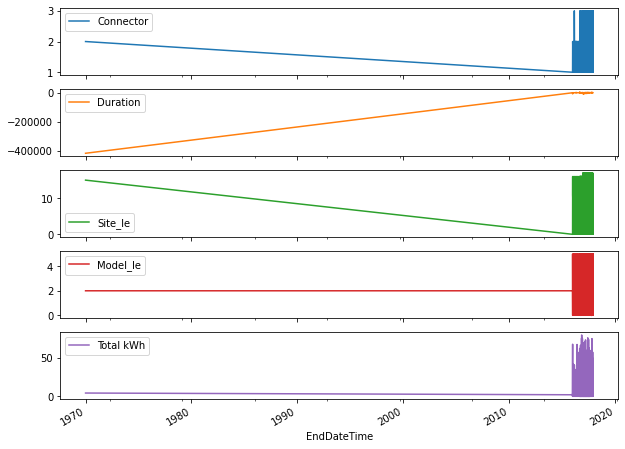

In [75]:
df2.set_index('EndDateTime')[['Connector','Duration','Site_le','Model_le','Total kWh']].plot(subplots= True)

In [76]:
df2 = df2.drop(columns=['EndDateTime'])
df3=df2[['Connector','Duration','Site_le','Model_le','Total kWh']]

In [77]:
df3

,Connector,Duration,Site_le,Model_le,Total kWh
0,2,0.983333,4,2,18.270
1,1,0.500000,8,5,19.450
2,2,0.633333,17,2,19.710
3,2,0.333333,13,2,9.840
4,2,1.000000,0,2,14.170
...,...,...,...,...,...
13671,2,0.250000,13,2,3.580
13672,1,7.716667,15,0,10.380
13673,1,6.166667,3,0,13.930
13674,2,1.166667,15,0,3.870


In [78]:
df3_input=df3[['Total kWh','Connector','Duration','Site_le','Model_le']]

In [79]:
df3_input

,Total kWh,Connector,Duration,Site_le,Model_le
0,18.270,2,0.983333,4,2
1,19.450,1,0.500000,8,5
2,19.710,2,0.633333,17,2
3,9.840,2,0.333333,13,2
4,14.170,2,1.000000,0,2
...,...,...,...,...,...
13671,3.580,2,0.250000,13,2
13672,10.380,1,7.716667,15,0
13673,13.930,1,6.166667,3,0
13674,3.870,2,1.166667,15,0


In [80]:
df3_input.describe()

,Total kWh,Connector,Duration,Site_le,Model_le
count,13639.000000,13639.000000,13639.000000,13639.000000,13639.000000
mean,10.200244,1.680475,-27.837946,9.419679,1.920889
std,8.387391,0.506267,3564.258958,5.376074,1.223566
min,0.000000,1.000000,-414900.183333,0.000000,0.000000
25%,4.710000,1.000000,0.300000,4.000000,2.000000
50%,8.371000,2.000000,0.500000,11.000000,2.000000
75%,14.250000,2.000000,1.000000,14.000000,2.000000
max,79.250000,3.000000,5951.200000,17.000000,5.000000


In [81]:
scaler = MinMaxScaler()
df3_scaled = scaler.fit_transform(df3_input)

In [82]:
df3_scaled

array([[0.23053628, 0.5       , 0.98586148, 0.23529412, 0.4       ],
       [0.24542587, 0.        , 0.98586033, 0.47058824, 1.        ],
       [0.24870662, 0.5       , 0.98586065, 1.        , 0.4       ],
       ...,
       [0.17577287, 0.        , 0.98587379, 0.17647059, 0.        ],
       [0.04883281, 0.5       , 0.98586191, 0.88235294, 0.        ],
       [0.02629653, 0.        , 0.98585938, 0.        , 0.4       ]])

In [83]:
features = df3_scaled
target= df3_scaled[:,0]

In [84]:
TimeseriesGenerator(features, target, length=2, sampling_rate=1, batch_size=1)[0]

(array([[[0.23053628, 0.5       , 0.98586148, 0.23529412, 0.4       ],
         [0.24542587, 0.        , 0.98586033, 0.47058824, 1.        ]]]),
 array([0.24870662]))

In [85]:
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.20, random_state=123, shuffle=False)

In [86]:
x_train.shape

(10911, 5)

In [87]:
x_test.shape

(2728, 5)

In [88]:
win_length=720
batch_size=32
num_features = 4
train_generator = TimeseriesGenerator(x_train, y_train, length=win_length, sampling_rate=1,batch_size=batch_size)
test_generator = TimeseriesGenerator(x_test, y_test, length=win_length, sampling_rate=1,batch_size=batch_size)

In [89]:
train_generator[0]

(array([[[0.23053628, 0.5       , 0.98586148, 0.23529412, 0.4       ],
         [0.24542587, 0.        , 0.98586033, 0.47058824, 1.        ],
         [0.24870662, 0.5       , 0.98586065, 1.        , 0.4       ],
         ...,
         [0.11987382, 0.        , 0.98585989, 1.        , 0.4       ],
         [0.12290221, 0.5       , 0.98586128, 1.        , 0.        ],
         [0.01998738, 0.        , 0.98586239, 0.41176471, 0.6       ]],
 
        [[0.24542587, 0.        , 0.98586033, 0.47058824, 1.        ],
         [0.24870662, 0.5       , 0.98586065, 1.        , 0.4       ],
         [0.12416404, 0.5       , 0.98585993, 0.76470588, 0.4       ],
         ...,
         [0.12290221, 0.5       , 0.98586128, 1.        , 0.        ],
         [0.01998738, 0.        , 0.98586239, 0.41176471, 0.6       ],
         [0.27760252, 0.5       , 0.98586033, 0.88235294, 0.4       ]],
 
        [[0.24870662, 0.5       , 0.98586065, 1.        , 0.4       ],
         [0.12416404, 0.5       , 0.9858599

In [90]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(128, input_shape=(win_length,num_features),return_sequences=True))
model.add(tf.keras.layers.LeakyReLU(alpha=0.5))
model.add(tf.keras.layers.LSTM(128, return_sequences=True))
model.add(tf.keras.layers.LeakyReLU(alpha=0.5))
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.LSTM(64, return_sequences=False))
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.Dense(1))

In [91]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 720, 128)          68096     
                                                                 
 leaky_re_lu_2 (LeakyReLU)   (None, 720, 128)          0         
                                                                 
 lstm_4 (LSTM)               (None, 720, 128)          131584    
                                                                 
 leaky_re_lu_3 (LeakyReLU)   (None, 720, 128)          0         
                                                                 
 dropout_2 (Dropout)         (None, 720, 128)          0         
                                                                 
 lstm_5 (LSTM)               (None, 64)                49408     
                                                                 
 dropout_3 (Dropout)         (None, 64)               

In [92]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience=2,mode='min')

In [93]:
model.compile(loss=tf.losses.MeanSquaredError(),
              optimizer = tf.optimizers.Adam(),
              metrics =[tf.metrics.MeanAbsoluteError()])

In [94]:
history = model.fit_generator(train_generator, epochs=50,
                              validation_data = test_generator,
                              shuffle = False,
                              callbacks=[early_stopping])

Epoch 1/50


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  after removing the cwd from sys.path.


319/319 [==============================] - 31s 84ms/step - loss: 0.0136 - mean_absolute_error: 0.0837 - val_loss: 0.0108 - val_mean_absolute_error: 0.0829
Epoch 2/50
319/319 [==============================] - 26s 81ms/step - loss: 0.0117 - mean_absolute_error: 0.0791 - val_loss: 0.0107 - val_mean_absolute_error: 0.0824
Epoch 3/50
319/319 [==============================] - 26s 80ms/step - loss: 0.0116 - mean_absolute_error: 0.0789 - val_loss: 0.0104 - val_mean_absolute_error: 0.0803
Epoch 4/50
319/319 [==============================] - 26s 82ms/step - loss: 0.0115 - mean_absolute_error: 0.0790 - val_loss: 0.0104 - val_mean_absolute_error: 0.0802
Epoch 5/50
319/319 [==============================] - 25s 79ms/step - loss: 0.0115 - mean_absolute_error: 0.0787 - val_loss: 0.0103 - val_mean_absolute_error: 0.0795
Epoch 6/50
319/319 [==============================] - 26s 80ms/step - loss: 0.0115 - mean_absolute_error: 0.0787 - val_loss: 0.0103 - val_mean_absolute_error: 0.0794
Epoch 7/50
319/

In [95]:
model.evaluate_generator(test_generator,verbose=1)

 3/63 [>.............................] - ETA: 2s - loss: 0.0140 - mean_absolute_error: 0.0885

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  """Entry point for launching an IPython kernel.


63/63 [==============================] - 2s 34ms/step - loss: 0.0107 - mean_absolute_error: 0.0820


[0.010676746256649494, 0.08199568092823029]

In [96]:
predictions=model.predict_generator(test_generator)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  """Entry point for launching an IPython kernel.


In [97]:
predictions.shape[0]

2008

In [98]:
predictions

array([[0.1478535 ],
       [0.14788848],
       [0.1479401 ],
       ...,
       [0.14805625],
       [0.1481322 ],
       [0.14823419]], dtype=float32)

In [99]:
y_test

array([0.        , 0.        , 0.11785489, ..., 0.17577287, 0.04883281,
       0.02629653])

In [100]:
x_test

array([[0.        , 0.        , 0.98585918, 0.94117647, 0.        ],
       [0.        , 0.        , 0.98585922, 0.94117647, 0.        ],
       [0.11785489, 0.        , 0.98586912, 0.94117647, 0.        ],
       ...,
       [0.17577287, 0.        , 0.98587379, 0.17647059, 0.        ],
       [0.04883281, 0.5       , 0.98586191, 0.88235294, 0.        ],
       [0.02629653, 0.        , 0.98585938, 0.        , 0.4       ]])

In [101]:
x_test[:,1:][win_length:]

array([[0.5       , 0.98586564, 0.76470588, 0.        ],
       [0.5       , 0.98586152, 0.94117647, 0.        ],
       [0.5       , 0.98585989, 0.94117647, 0.4       ],
       ...,
       [0.        , 0.98587379, 0.17647059, 0.        ],
       [0.5       , 0.98586191, 0.88235294, 0.        ],
       [0.        , 0.98585938, 0.        , 0.4       ]])

In [102]:
df_pred=pd.concat([pd.DataFrame(predictions),pd.DataFrame(x_test[:,1:][win_length:])],axis=1)

In [103]:
rev_trans = scaler.inverse_transform(df_pred)

In [104]:
rev_trans

array([[11.71738937,  2.        ,  2.73333333, 13.        ,  0.        ],
       [11.72016217,  2.        ,  1.        , 16.        ,  0.        ],
       [11.72425286,  2.        ,  0.31666667, 16.        ,  2.        ],
       ...,
       [11.73345811,  1.        ,  6.16666667,  3.        ,  0.        ],
       [11.73947725,  2.        ,  1.16666667, 15.        ,  0.        ],
       [11.74755944,  1.        ,  0.1       ,  0.        ,  2.        ]])

In [105]:
df_final=df3_input[predictions.shape[0]*-1:]

In [106]:
df_final.count()

Total kWh    2008
Connector    2008
Duration     2008
Site_le      2008
Model_le     2008
dtype: int64

In [107]:
df_final['App_Pred']=rev_trans[:,0]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [108]:
df_final

,Total kWh,Connector,Duration,Site_le,Model_le,App_Pred
11663,6.690,2,2.733333,13,0,11.717389
11664,3.080,2,1.000000,16,0,11.720162
11665,3.780,2,0.316667,16,2,11.724253
11666,1.380,2,0.116667,11,2,11.717172
11667,3.230,2,0.083333,3,2,11.703942
...,...,...,...,...,...,...
13671,3.580,2,0.250000,13,2,11.740581
13672,10.380,1,7.716667,15,0,11.741669
13673,13.930,1,6.166667,3,0,11.733458
13674,3.870,2,1.166667,15,0,11.739477


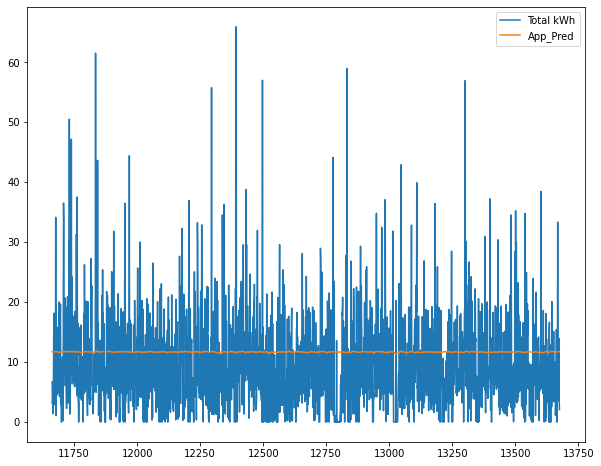

In [109]:
df_final[['Total kWh','App_Pred']].plot()

In [110]:
# categorical_cols = ['Site', 'Model'] 

# from sklearn.preprocessing import LabelEncoder
# # instantiate labelencoder object
# le = LabelEncoder()

# # apply le on categorical feature columns
# df1[categorical_cols] = df1[categorical_cols].apply(lambda col: le.fit_transform(col))    
# from sklearn.preprocessing import OneHotEncoder
# ohe = OneHotEncoder()

# #One-hot-encode the categorical columns.
# #Unfortunately outputs an array instead of dataframe.
# array_hot_encoded = ohe.fit_transform(df1[categorical_cols])

# #Convert it to df
# data_hot_encoded = pd.DataFrame(array_hot_encoded, index=df1.index)

# #Extract only the columns that didnt need to be encoded
# data_other_cols = df1.drop(columns=categorical_cols)

# #Concatenate the two dataframes : 
# df2 = pd.concat([data_hot_encoded, data_other_cols], axis=1)

In [111]:
# df2

In [112]:
# df2.dtypes